## Pré Processamento

In [5]:
import pandas as pd

df = pd.read_csv('./data/sensores_data.csv')

print(df.head())

   Time  Sensor  Temperature   Humidity
0     1       1    23.745401  43.702659
1     2       1    29.507143  50.838019
2     3       1    27.319939  57.458917
3     4       1    25.986585  54.644498
4     5       1    21.560186  56.131223


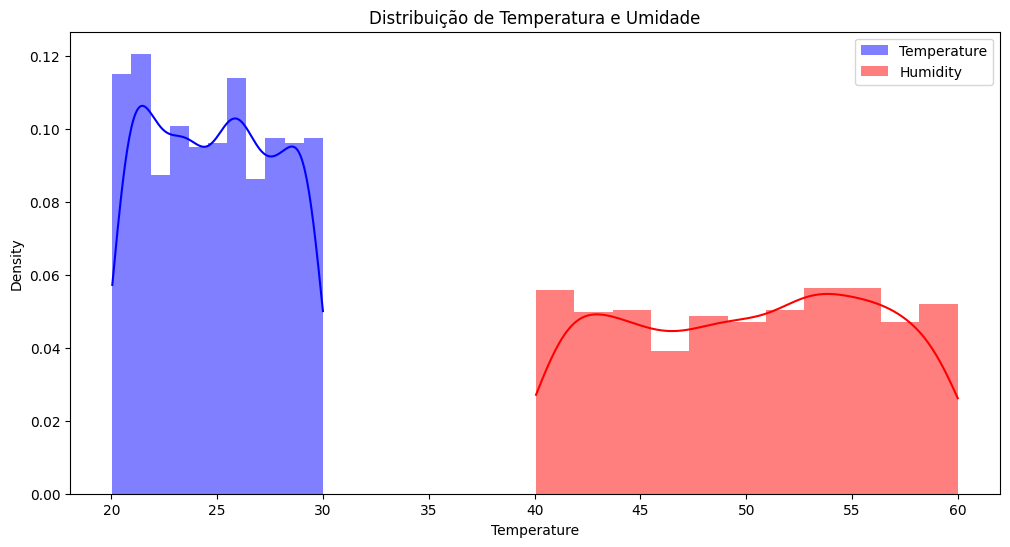

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(df['Temperature'], kde=True, color='blue', label='Temperature', stat='density', linewidth=0)
sns.histplot(df['Humidity'], kde=True, color='red', label='Humidity', stat='density', linewidth=0)
plt.legend()
plt.title("Distribuição de Temperatura e Umidade")
plt.show()


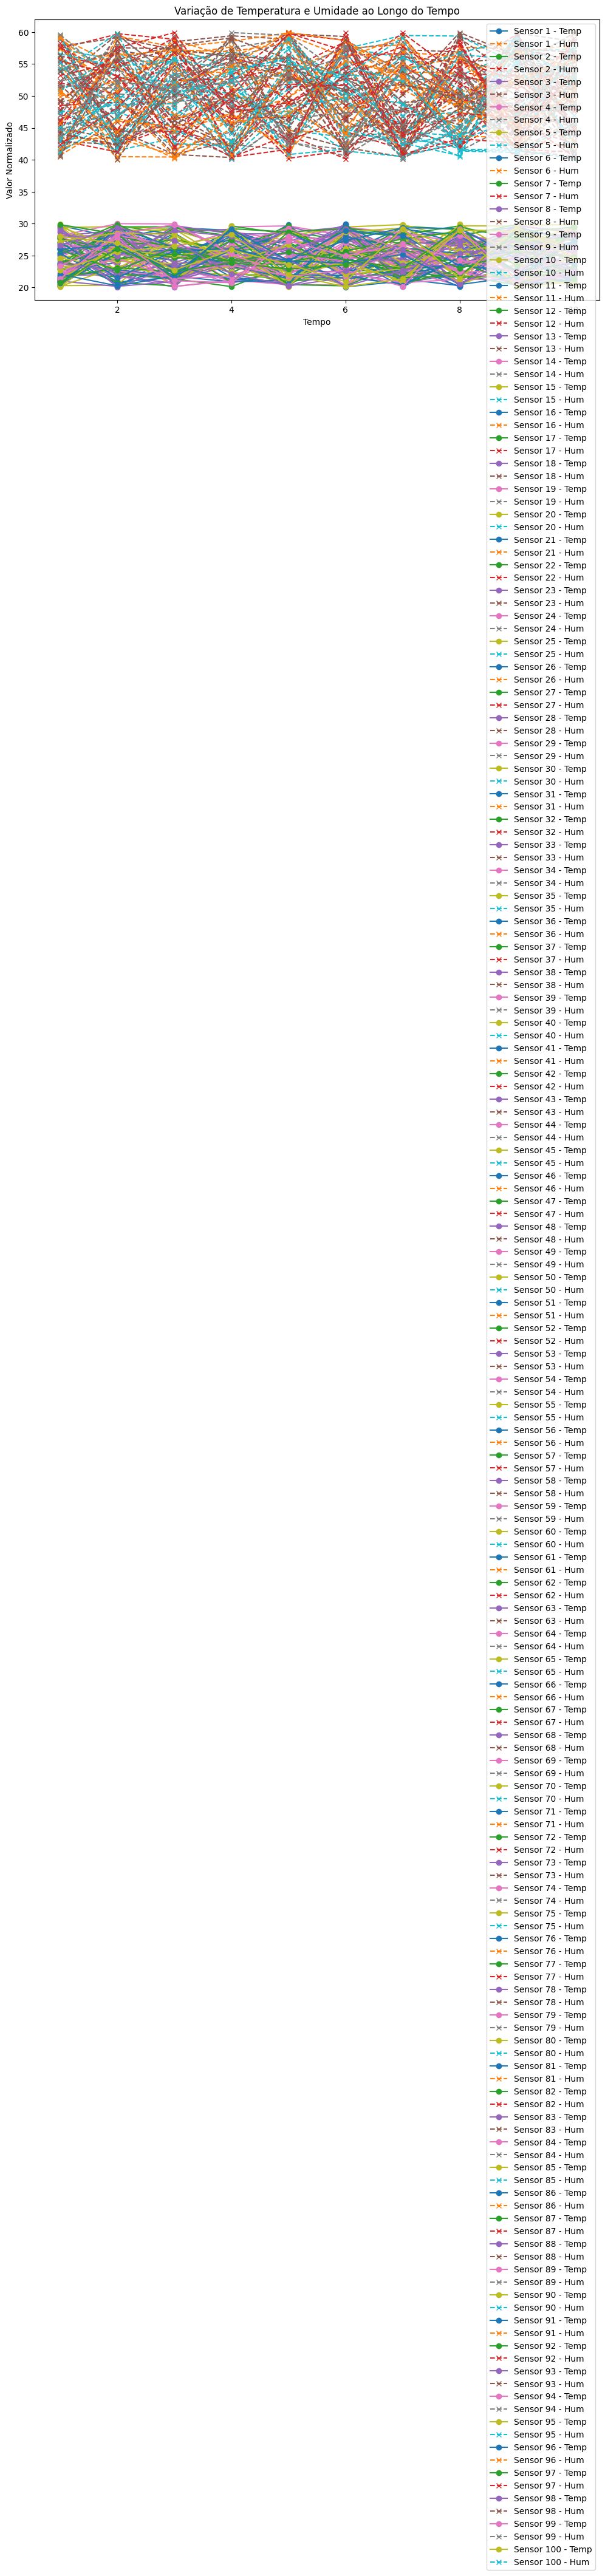

In [ ]:
plt.figure(figsize=(12, 6))
for sensor_id in df['Sensor'].unique():
    sensor_data = df[df['Sensor'] == sensor_id]
    plt.plot(sensor_data['Time'], sensor_data['Temperature'], label=f'Sensor {sensor_id} - Temp', linestyle='-', marker='o')
    plt.plot(sensor_data['Time'], sensor_data['Humidity'], label=f'Sensor {sensor_id} - Hum', linestyle='--', marker='x')

plt.xlabel("Tempo")
plt.ylabel("Valor Normalizado")
plt.title("Variação de Temperatura e Umidade ao Longo do Tempo")
plt.legend(loc='upper right')
plt.show()


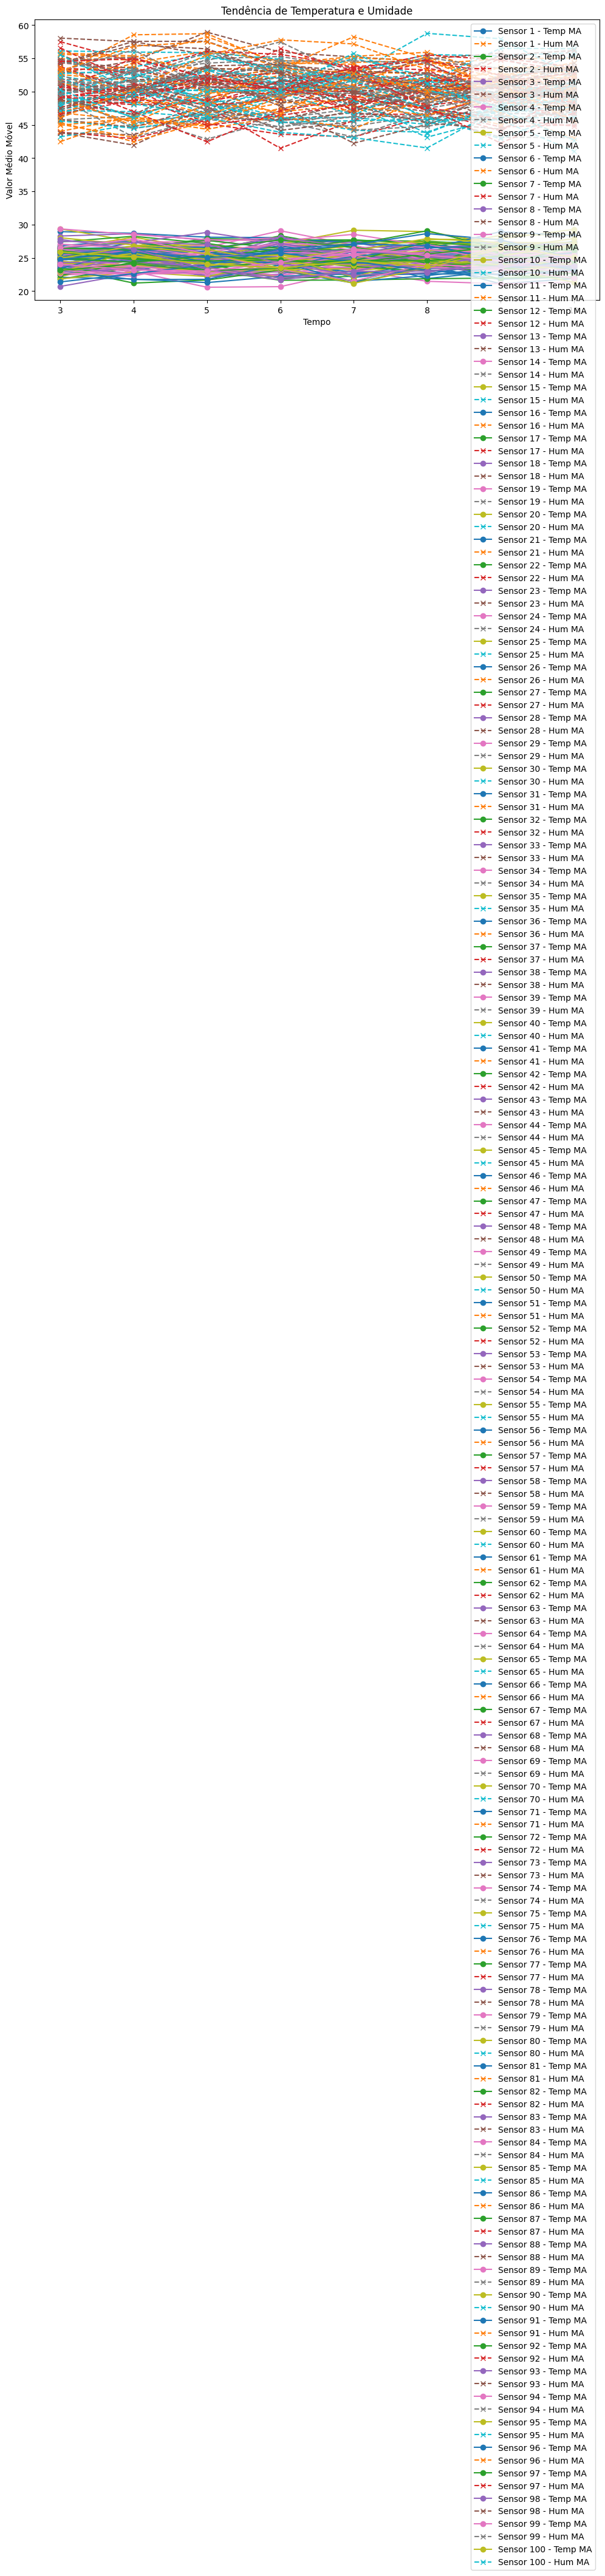

In [ ]:
df['Temp_MA'] = df.groupby('Sensor')['Temperature'].transform(lambda x: x.rolling(window=3).mean())
df['Humidity_MA'] = df.groupby('Sensor')['Humidity'].transform(lambda x: x.rolling(window=3).mean())

plt.figure(figsize=(12, 6))
for sensor_id in df['Sensor'].unique():
    sensor_data = df[df['Sensor'] == sensor_id]
    plt.plot(sensor_data['Time'], sensor_data['Temp_MA'], label=f'Sensor {sensor_id} - Temp MA', linestyle='-', marker='o')
    plt.plot(sensor_data['Time'], sensor_data['Humidity_MA'], label=f'Sensor {sensor_id} - Hum MA', linestyle='--', marker='x')

plt.xlabel("Tempo")
plt.ylabel("Valor Médio Móvel")
plt.title("Tendência de Temperatura e Umidade")
plt.legend(loc='upper right')
plt.show()
